In [527]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pylab
import scipy.stats as stats
from scipy.stats import norm


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import math
import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import ExponentialSmoothing
from scipy.special import ndtri
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Descarga de información

In [528]:
data=yf.download(tickers="GC=F",period='max',interval='1mo',group_by='column',auto_adjust=True,prepost=True,threads=True,proxy=None)

[*********************100%%**********************]  1 of 1 completed


Analisis de datos

In [529]:
data=data['2000-01-01':'2024-07-01']

In [530]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [531]:
df_d=data.Close
df_h=data.High
df_l=data.Low
df_v=data.Volume
df_o=data.Open

In [532]:
fec_inicial='2005-01-01'
db=df_d[fec_inicial:]
dh=df_h[fec_inicial:]
dl=df_l[fec_inicial:]
dv=df_v[fec_inicial:]
dvar=dh-dl

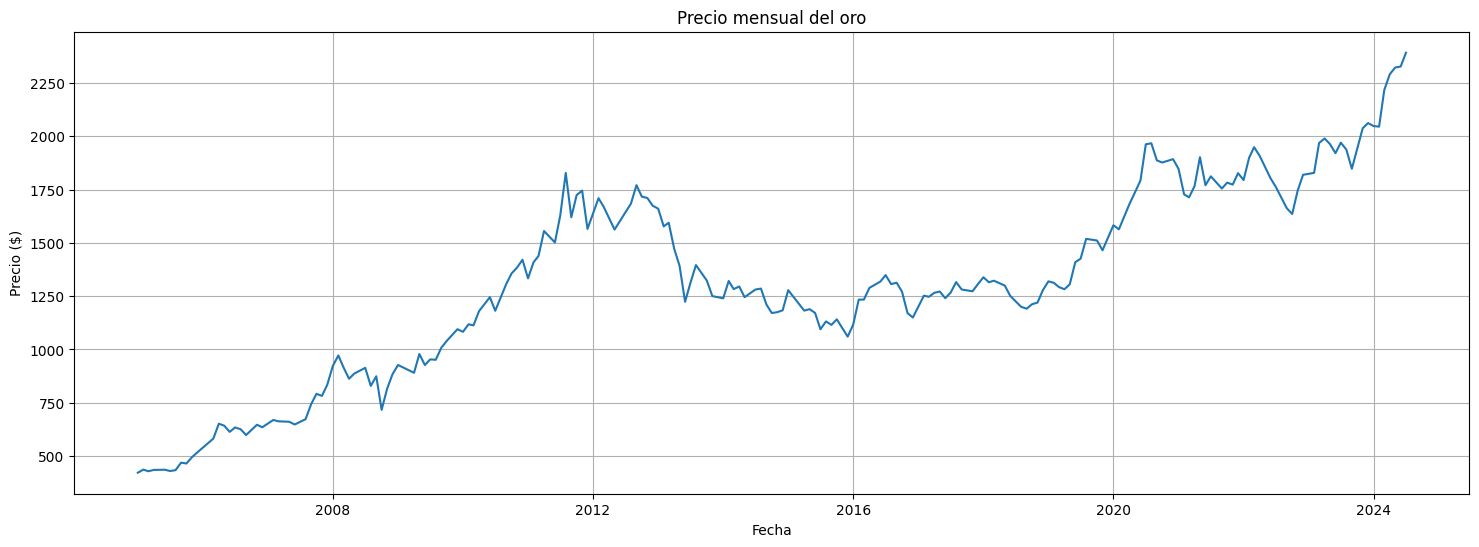

In [533]:
plt.clf()

plt.rcParams['figure.figsize']=[18,6]
plt.plot(db)
plt.title('Precio mensual del oro')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.grid(True)
plt.show()

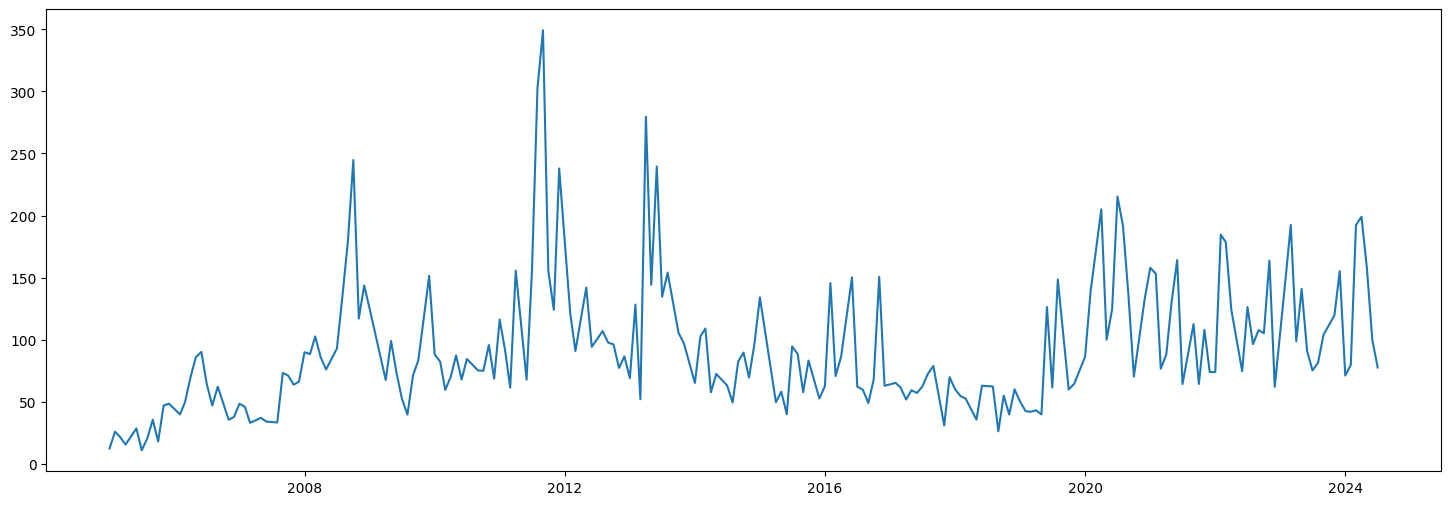

In [534]:
plt.rcParams['figure.figsize']=[18,6]
plt.plot(dvar)

ACF muestra la correlación entre una serie temporal y sus versiones retrasadas. <br>
PACF muestra la correlación entre una serie temporal y su versión retrasada después de eliminar las correlaciones explicadas por los retrasos anteriores. <br>
Estos gráficos te ayudarán a interpretar la estructura de correlación de una serie de tiempo y son útiles para identificar posibles modelos para el análisis de series temporales, como modelos AR (autoregresivos) y MA (medias móviles).

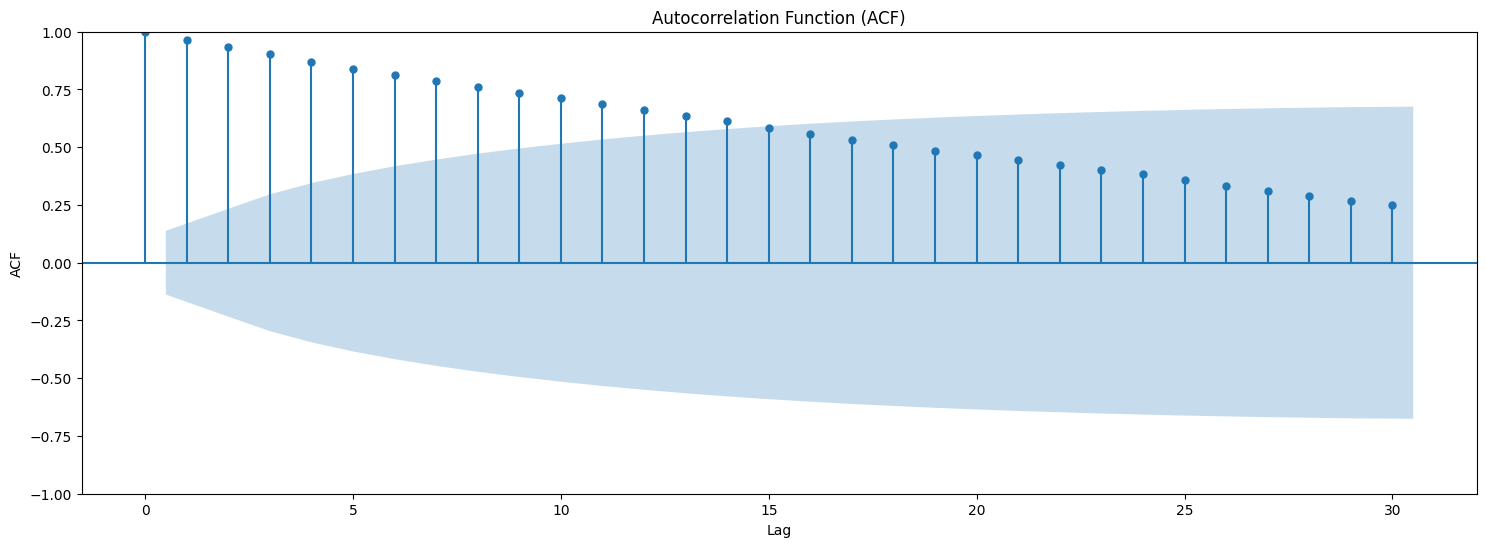

In [535]:
# Calcular y graficar ACF
plot_acf(db, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

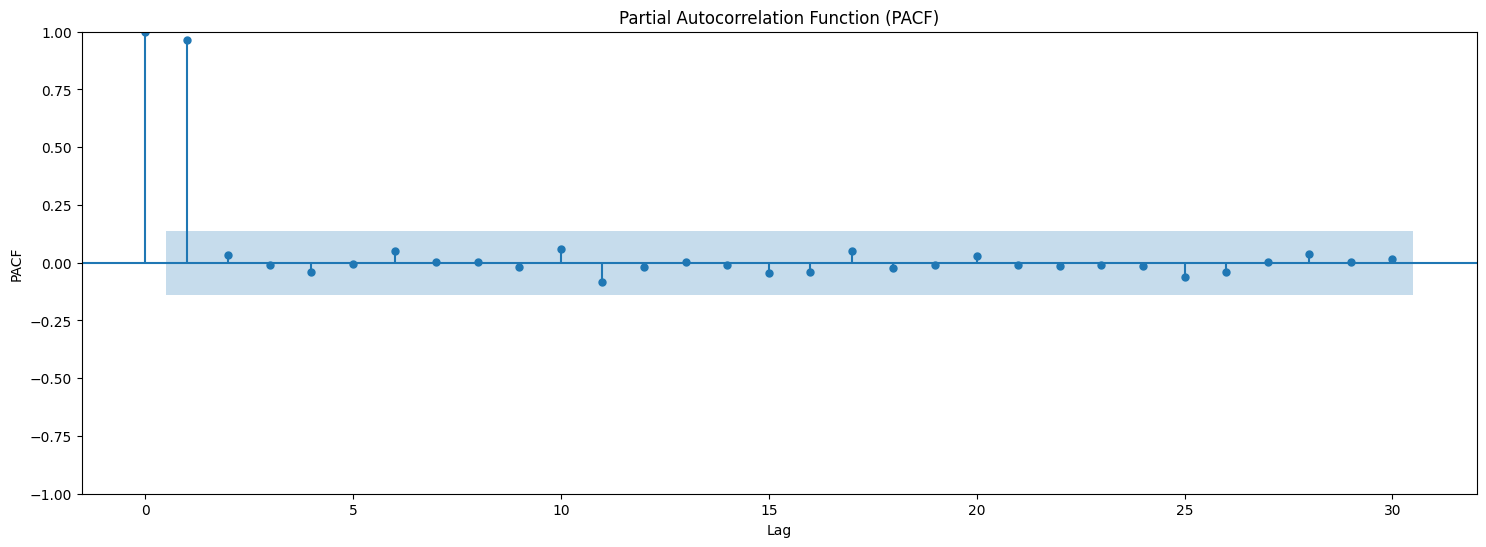

In [536]:
# Calcular y graficar PACF
plot_pacf(db, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [537]:
# Ajuste del modelo Holt-Winters con diferentes seasonal_periods
seasonal_periods_list = [30, 24, 18, 12, 6, 4]  # Ejemplos de valores para probar

for sp in seasonal_periods_list:
    model = ExponentialSmoothing(db, seasonal_periods=sp, trend='add', seasonal='add').fit()
    print(f"Seasonal periods: {sp}, AIC: {model.aic}")

# Seleccionar el modelo con el menor AIC como el más adecuado

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 30, AIC: 1724.8594974307284
Seasonal periods: 24, AIC: 1725.1403988977052


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 18, AIC: 1729.9914419362958
Seasonal periods: 12, AIC: 1717.4097957016802


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 6, AIC: 1709.0291051667348
Seasonal periods: 4, AIC: 1705.7798712119506


In [538]:
# Ajuste del modelo Holt-Winters con diferentes seasonal_periods
seasonal_periods_list = [30, 24, 18, 12, 6, 4]  # Ejemplos de valores para probar

for sp in seasonal_periods_list:
    model = ExponentialSmoothing(db, seasonal_periods=sp, trend='mul', seasonal='mul').fit()
    print(f"Seasonal periods: {sp}, AIC: {model.aic}")

# Seleccionar el modelo con el menor AIC como el más adecuado

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 30, AIC: 1723.9340181365167
Seasonal periods: 24, AIC: 1733.332069972


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 18, AIC: 1724.6954888616783


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 12, AIC: 1724.8912413777125


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 6, AIC: 1716.6396896810868


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Seasonal periods: 4, AIC: 1716.277803320781


### Predicción

#### 12 meses

In [539]:
# Suponiendo que quieres predecir los últimos 12 meses (1 año)
train = db.iloc[:-12]
test = db.iloc[-12:]

In [540]:

model=HWES(train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  190
Model:             ExponentialSmoothing   SSE                         796824.304
Optimized:                         True   AIC                           1640.859
Trend:                   Multiplicative   BIC                           1731.776
Seasonal:                Multiplicative   AICC                          1652.558
Seasonal Periods:                    24   Date:                 Mon, 08 Jul 2024
Box-Cox:                          False   Time:                         04:59:42
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889275                alpha                 True
smoothing_trend          

Error medio absoluto (MAE): 126.93739584295453
Error cuadrático medio (MSE): 20537.476547622584
Raíz del error cuadrático medio (RMSE): 143.30902465519253


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


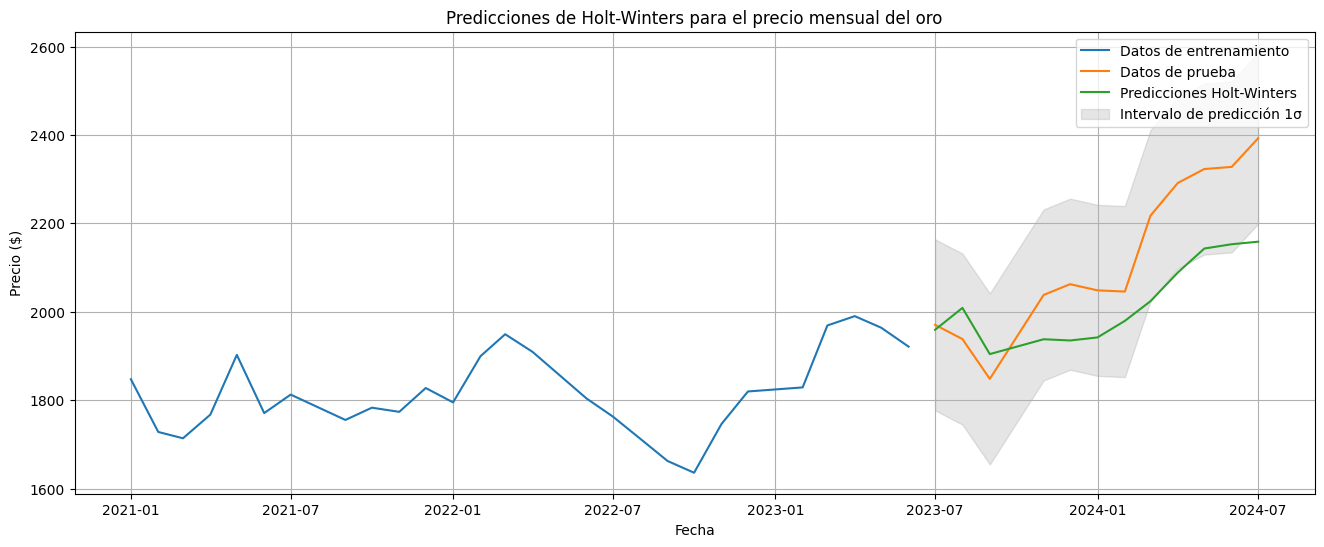

In [541]:
# Predicción para los próximos 12 meses
predicciones = fitted.forecast(12)

# Evaluación del modelo
mae = mean_absolute_error(test, predicciones)
mse = mean_squared_error(test, predicciones)
rmse = np.sqrt(mse)
print(f'Error medio absoluto (MAE): {mae}')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse}')

# Estimación del error estándar de las predicciones
std_error = np.std(train)

# Valor de probabilidad acumulada (percentil) para el que queremos encontrar el valor inverso
percentil = .68
# Calcular el valor inverso de la distribución normal estándar (Z-score)
z_value = norm.ppf(percentil)


# Calculamos el intervalo de predicción para cada predicción
intervalo_inf = test - z_value * std_error
intervalo_sup = test + z_value * std_error


# Visualización de las predicciones
plt.figure(figsize=(16, 6))
plt.plot(train['2021-01-01':].index, train['2021-01-01':], label='Datos de entrenamiento')
plt.plot(test.index, test, label='Datos de prueba')
plt.plot(test.index, predicciones, label='Predicciones Holt-Winters')
plt.fill_between(test.index, intervalo_inf, intervalo_sup, color='gray', alpha=0.2, label='Intervalo de predicción 1σ')
plt.title('Predicciones de Holt-Winters para el precio mensual del oro')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()

#### 6 meses

In [542]:
# Suponiendo que quieres predecir los últimos 6 meses
train = db.iloc[:-6]
test = db.iloc[-6:]

In [543]:
model=HWES(train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  196
Model:             ExponentialSmoothing   SSE                         808383.210
Optimized:                         True   AIC                           1687.637
Trend:                   Multiplicative   BIC                           1779.424
Seasonal:                Multiplicative   AICC                          1698.909
Seasonal Periods:                    24   Date:                 Mon, 08 Jul 2024
Box-Cox:                          False   Time:                         04:59:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889281                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Error medio absoluto (MAE): 67.71260095396572
Error cuadrático medio (MSE): 5047.092331348248
Raíz del error cuadrático medio (RMSE): 71.0428907868215


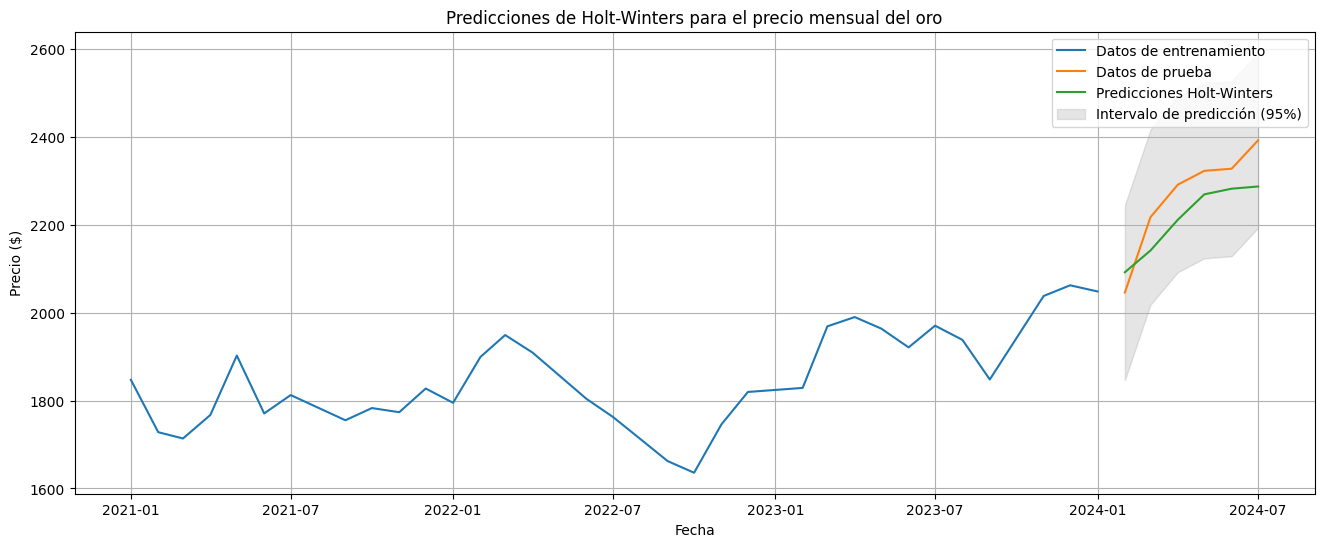

In [544]:
# Predicción para los próximos 6 meses
predicciones = fitted.forecast(6)

# Evaluación del modelo
mae = mean_absolute_error(test, predicciones)
mse = mean_squared_error(test, predicciones)
rmse = np.sqrt(mse)
print(f'Error medio absoluto (MAE): {mae}')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse}')


# Estimación del error estándar de las predicciones
std_error = np.std(train)

# Valor de probabilidad acumulada (percentil) para el que queremos encontrar el valor inverso
percentil = .68
# Calcular el valor inverso de la distribución normal estándar (Z-score)
z_value = norm.ppf(percentil)


# Calculamos el intervalo de predicción para cada predicción
intervalo_inf = test - z_value * std_error
intervalo_sup = test + z_value * std_error


# Visualización de las predicciones
plt.figure(figsize=(16, 6))
plt.plot(train['2021-01-01':].index, train['2021-01-01':], label='Datos de entrenamiento')
plt.plot(test.index, test, label='Datos de prueba')
plt.plot(test.index, predicciones, label='Predicciones Holt-Winters')
plt.fill_between(test.index, intervalo_inf, intervalo_sup, color='gray', alpha=0.2, label='Intervalo de predicción (95%)')
plt.title('Predicciones de Holt-Winters para el precio mensual del oro')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()



#### 3 meses

In [545]:
# Suponiendo que quieres predecir los últimos 3 meses
train = db.iloc[:-3]
test = db.iloc[-3:]

In [546]:
model=HWES(train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  199
Model:             ExponentialSmoothing   SSE                         820804.219
Optimized:                         True   AIC                           1712.622
Trend:                   Multiplicative   BIC                           1804.835
Seasonal:                Multiplicative   AICC                          1723.694
Seasonal Periods:                    24   Date:                 Mon, 08 Jul 2024
Box-Cox:                          False   Time:                         04:59:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8891222                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Error medio absoluto (MAE): 27.962846182870482
Error cuadrático medio (MSE): 948.9991952835181
Raíz del error cuadrático medio (RMSE): 30.805830540394755


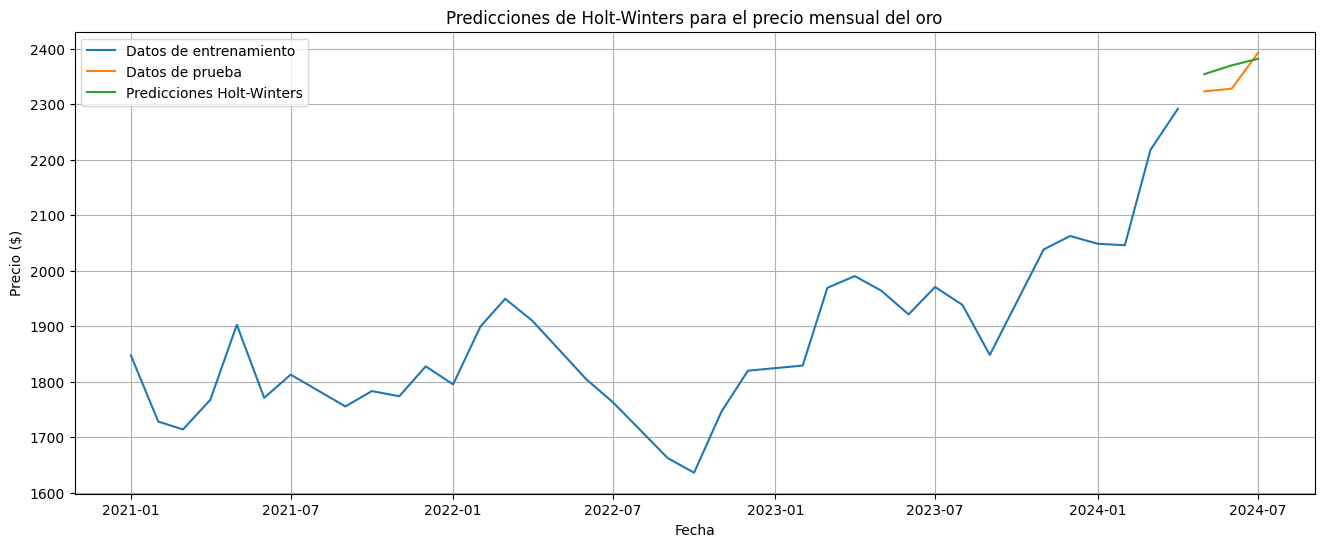

In [547]:
# Predicción para los próximos 3 meses
predicciones = fitted.forecast(3)

# Evaluación del modelo
mae = mean_absolute_error(test, predicciones)
mse = mean_squared_error(test, predicciones)
rmse = np.sqrt(mse)
print(f'Error medio absoluto (MAE): {mae}')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse}')

# Visualización de las predicciones
plt.figure(figsize=(16, 6))
plt.plot(train['2021-01-01':].index, train['2021-01-01':], label='Datos de entrenamiento')
plt.plot(test.index, test, label='Datos de prueba')
plt.plot(test.index, predicciones, label='Predicciones Holt-Winters')
plt.title('Predicciones de Holt-Winters para el precio mensual del oro')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()

#### 1 mes

In [548]:
# Suponiendo que quieres predecir los últimos 1 mes
train = db.iloc[:-1]
test = db.iloc[-1:]

In [549]:
model=HWES(train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  201
Model:             ExponentialSmoothing   SSE                         823249.276
Optimized:                         True   AIC                           1727.860
Trend:                   Multiplicative   BIC                           1820.352
Seasonal:                Multiplicative   AICC                          1738.801
Seasonal Periods:                    24   Date:                 Mon, 08 Jul 2024
Box-Cox:                          False   Time:                         04:59:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889278                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Error medio absoluto (MAE): 57.032191474357205
Error cuadrático medio (MSE): 3252.6708643677425
Raíz del error cuadrático medio (RMSE): 57.032191474357205


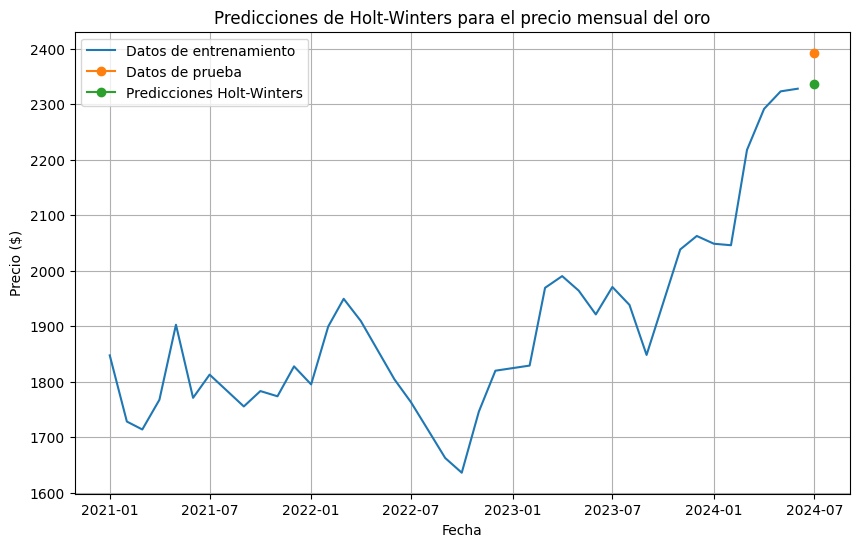

In [550]:
# Predicción para los próximos 1 meses
predicciones = fitted.forecast(1)

# Evaluación del modelo
mae = mean_absolute_error(test, predicciones)
mse = mean_squared_error(test, predicciones)
rmse = np.sqrt(mse)
print(f'Error medio absoluto (MAE): {mae}')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse}')

# Visualización de las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train['2021-01-01':].index, train['2021-01-01':], label='Datos de entrenamiento')
plt.plot(test.index, test, label='Datos de prueba',marker='o')
plt.plot(test.index, predicciones, label='Predicciones Holt-Winters',marker='o')
plt.title('Predicciones de Holt-Winters para el precio mensual del oro')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()